# Deep learning with Keras on Iris dataset 

In this practice project we will build a deep learning model to predict the type of flower with the popular Iris dataset. We will do this using the Keras library.

## Setup

In [238]:
#Install related libraries for the project. 

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt

## Prepare Input Data for Deep Learning

The input data should be preprocessed and prepared for deep learning before it can be used to train the models. We will perform the following steps for preparing data:

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Separate the feature and target variables 
4. Scale the feature dataset
5. Use one-hot-encoding for the target variable
6. Split into training and test datasets


### 1. Load data into a pandas dataframe

We first load the iris.csv file in into a pandas dataframe. We then print the contents of the dataframe to check.

In [239]:
#Load Data and review content
iris_data = pd.read_csv("iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


The target variable 'Species' is a text field. It needs to be converted to a numeric representation for deep learning. For this, we use a LabelEncoder model based on the species column, and then update the species column with the corresponding encoding.

In [240]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(
                                iris_data['Species'])

 ### 2. Convert the dataframe to a numpy array
 
 Now, we convert the dataframe into a NumPy array, which is the preferred input format for Keras deep learning.

In [241]:
#Convert input to numpy array
np_iris = iris_data.to_numpy()

### 3. Separate the feature and target variables

We separate the feature and target variables into different variables, namely X_data and Y_data. X_data has four columns and Y_data has one. We print the feature variables and target variable to check.

In [242]:
#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])


Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]


### 4. Scale the feature dataset

Since the feature variables are numeric and each column may be on a different scale, we need to standardize the scaling. For this, we create a scaler model on the data in X_data. Then we transform the data in X_data using this model. We will print the features after scaling.

In [243]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### 5. Use one-hot-encoding for the target variable

Since the target variables is multi-class, we will use one hot encoding to create three columns with each column representing a species. We will print the features after one hot encoding.

In [244]:
#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])


Target after one-hot-encoding :
------------------------------------
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### 6. Split into training and test datasets

Finally, we need to split the data set into training and test data sets. 10% of the data set is allocated for testing. We print the dimension of these data sets. Note: we are not splitting for validation as Keras has a feature to create a validation data set from the training data set. 

In [245]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


Now pre-processing is complete and we can see the output. We loaded the data in its raw form. We then converted the features into numeric values of the same scale. The target variable now is one hot encoded with three columns. And finally, we split training and test data.

## Creating a Model

Creating a model in Keras requires defining the following, the architecture and hyperparameters for the neural network. Once the model is defined we can train and retrain the model any number of times. 

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

Let's define the number of classes in the target variable. We have used one-hot encoding on the target variables before.

In [246]:
#Number of classes in the target variable
NB_CLASSES=3

We now proceed to create a sequential model in Keras.

In [247]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

We now start adding layers to the model. We add the first hidden layer of 128 nodes. This is a number we can experiment with as we improve the model. Then, we define the input shape. Since we know that we have four input variables, we define the same here. We provide a logical name 'Hidden-Layer-1' for the layer and this is helpful in printing information later. We will use rectified linear unit activation for this layer.

In [248]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

We add another hidden layer, Hidden-Layer-2 which will again have 128 nodes, and activation of relu.

In [249]:
#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))


Finally, we add the output layer. Here, the number of nodes will be equal to the number of classes in the target variable. We will use softmax activation to predict the probabilities of each class for the input provided.

In [250]:
#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

For loss computation, we will use categorical_crossentropy, since this is a multi-class classification model. We will also use accuracy as the metric to measure loss. We will assume default values for the other parameters to compile the model.

In [251]:
#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

Then, we will compile the model.We see the model summary being printed here. It shows each layer and the shape of the output. It also shows the total number of parameters in the model, which are the weights and biases across the two hidden and one output layer.

In [252]:
#Print the model meta-data
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the Model

We have now prepared the input data and created a model. Let's now go ahead and train the model.

We set the verbose to one, so Keras will print out details of progress during training.

In [253]:
#Make it verbose so we can see the progress
VERBOSE=1

We then set the hyper parameters for training. These are of course set initially on intuition and then fine tuned on experimentation as we improve the model. We set the batch size to 16, which is in the two power n range. We set the number of epochs to 10. We will use a validation split of 20%. This means that 20% of the training data will be used by Keras for validation after each epoch. Though the recommended percentage of validation is 10, we are using more samples since the total sample size is 150.

In [254]:
#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

Training a model is straightforward in Keras with a single function call. The model.fit method is used to train and also capture details about the training. The first parameter is the input feature variable followed by the target variable. Then we set values for batch size, epochs, verbose and validation split. This function will initialize the weights and biases, but from gradient descent and store the final weights and biases in the model. It also can expose the history of training as a return value.

In [255]:
print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 0s 23ms/step - loss: 0.8697 - accuracy: 0.6667 - val_loss: 0.6669 - val_accuracy: 0.7778
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5534 - accuracy: 0.8241 - val_loss: 0.5070 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4306 - accuracy: 0.8519 - val_loss: 0.4289 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3628 - accuracy: 0.8519 - val_loss: 0.3715 - val_accuracy: 0.8519
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3189 - accuracy: 0.8704 - val_loss: 0.3349 - val_accuracy: 0.8148
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2800 - accuracy: 0.8796 - val_loss: 0.3043 - val_accuracy: 0.8148
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.8981 - val_loss: 0.2904

We use this history and plot the accuracy of in sample predictions against the epochs. Finally, we will evaluate the model against the test data set and print the results.


Accuracy during Training :
------------------------------------


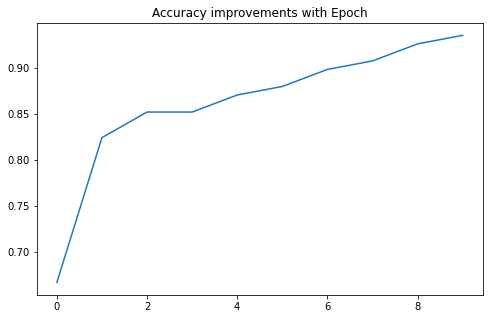


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 14ms/step - loss: 0.2798 - accuracy: 0.9333


[0.27984967827796936, 0.9333333373069763]

In [256]:
print("\nAccuracy during Training :\n------------------------------------")

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

We see the training progress printed after each epoch. It shows the total amount of time taken, and the last computed by the cost function. It also prints the accuracy of predictions against the in sample dataset. Additionally, it prints the loss and accuracy of predictions against the validation data set. From the plot, we can observe that as the number of epochs increases, the accuracy also increases progressively and reaches about 90%. If accuracy at this point is not acceptable, we can increase the number of epochs and retry. The evaluation against a test dataset also shows an accuracy of 93%.

## Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction.

In order to save a model, we use the save method to save the model architecture, parameters and other information to disk. Here we saved the contents to 'iris_save', which is a directory under which the model elements are saved. 

In [257]:
#Saving a model
    
model.save("iris_save")

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


We can load the model back with the load model function. Once loaded, we can print the summary and check the model.

In [258]:
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


We can also explore the contents of Iris save, the model is saved here in binary format with all the format and metadata under the root directory of the files. To copy the model, we need to copy the entire root directory and move it to the destination.

## Predictions with Deep Learning Models

Having trained a deep learning model for Iris, let's do some predictions with new data. We start with a prediction input of four feature variables namely; sepal length, sepal width, petal length and Petal width.

In [259]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

The featured variables need to go through the same set of pre-processing that was done during training. We use the same scaler model we built during training to scale the prediction feature variables too.

In [260]:
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

Then we use the predict method on the model to predict for the scaled input. The raw prediction results are captured and printed. The result is a list of probabilities of the various classes, as it applies for this input.

In [261]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

1/1 [==============================] - 0s 39ms/step
Raw Prediction Output (Probabilities) : [[0.03153917 0.6737354  0.29472545]]


We then use the argmax function to get the index of the highest probability. Then we use the same training label encoder to do the reverse transform and get the string for the species name.

In [262]:
#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Prediction is  ['versicolor']


For the raw output, we see the probabilities for the three classes namely; setosa, versicolor and virginica. The sum of the three probabilities will be one. From the list, versicolor has the highest probability of 65%. Then the inverse transform function will extract the corresponding name which is versicolor.